In [4]:
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 

In [2]:
with open("results/results-FINAL.json", "r") as f:
    res_summary = json.load(f)

In [3]:
res_summary[0]

{'path': 'EDS5.png',
 'prompt': 'Adjust the colors of this scene to be shades of red.',
 'image_path': 'test/images/242679/242679-input.png',
 'image_id': '242679',
 'prompt_type': 'color',
 'evaluation_dataset_idx': 5}

In [7]:
def get_original_image(res_sample):
    # append local path to image
    local_path = os.path.join("data/test-MagicBrush", res_sample["image_path"])
    # open image
    img = Image.open(local_path)
    return img

def get_output_image(res_sample):
    # append local path to image
    local_path = os.path.join("results/results", res_sample["path"])
    # open image
    img = Image.open(local_path)
    return img

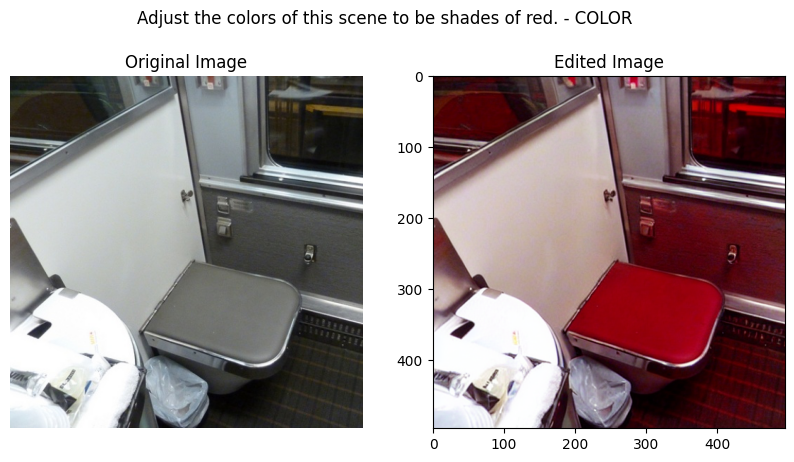

In [8]:
sample = res_summary[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

orig_img = get_original_image(sample)
edit_img = get_output_image(sample)

ax[0].imshow(orig_img)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(edit_img)
ax[1].set_title("Edited Image")
ax[0].axis("off")

fig.suptitle(f"{sample['prompt']} - {sample['prompt_type'].upper()}")

plt.show()

In [9]:
# build dataframe
df = pd.DataFrame(res_summary)

In [10]:
df.sample()

,path,prompt,image_path,image_id,prompt_type,evaluation_dataset_idx
411,EDS826.png,Adjust the colors of this scene to be tints of...,test/images/319522/319522-input.png,319522,color,826


In [13]:
df.prompt_type.value_counts()

prompt_type
color         500
conceptual    500
Name: count, dtype: int64

In [32]:
sample2 = df[df.prompt_type == "conceptual"].sample().to_dict(orient="records")[0]

In [34]:
sample2

{'path': 'EDS942.png',
 'prompt': 'Adjust the colors of this scene to be dramatic.',
 'image_path': 'test/images/532482/532482-input.png',
 'image_id': '532482',
 'prompt_type': 'conceptual',
 'evaluation_dataset_idx': 942}

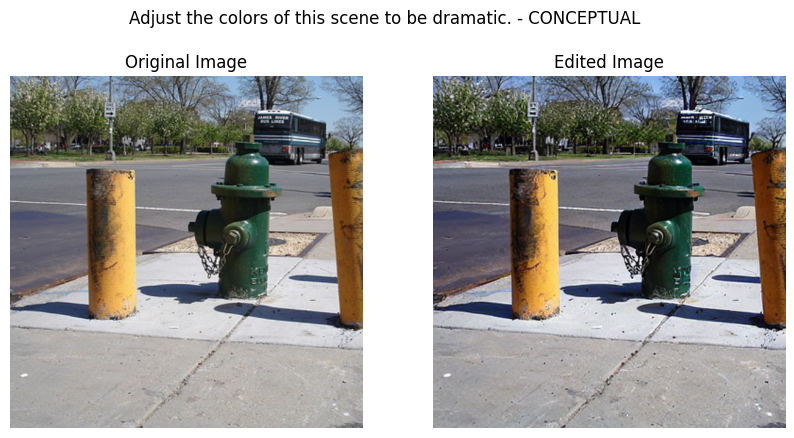

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

orig_img = get_original_image(sample2)
edit_img = get_output_image(sample2)

ax[0].imshow(orig_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(edit_img)
ax[1].set_title("Edited Image")
ax[1].axis("off")

fig.suptitle(f"{sample2['prompt']} - {sample2['prompt_type'].upper()}")

plt.show()